<a href="https://colab.research.google.com/github/younghoonNa/DACON_Predicting-airline-customer-satisfaction./blob/main/DACON_%E1%84%92%E1%85%A1%E1%86%BC%E1%84%80%E1%85%A9%E1%86%BC%E1%84%89%E1%85%A1_%E1%84%80%E1%85%A9%E1%84%80%E1%85%A2%E1%86%A8_%E1%84%86%E1%85%A1%E1%86%AB%E1%84%8C%E1%85%A9%E1%86%A8%E1%84%83%E1%85%A9_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 시작

In [1]:
# 라이브러리 설치
!pip install gdrive_dataset

In [2]:
#기본 모듈은 numpy 그리고 pandas 사용.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, Normalizer,RobustScaler, LabelEncoder
from scipy.stats import randint, uniform

#분류/Classifier 사용에 필요한 모델 import 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
!pip install pycaret[full]

In [4]:
#https://drive.google.com/file/d/1A3_7oKAjZPntGPxTPxSD-kbfrEszy-6l/view?usp=sharing
from gdrivedataset import loader

file_id = "1A3_7oKAjZPntGPxTPxSD-kbfrEszy-6l"
loader.load_from_google_drive(file_id)

========== files ============

data/test.csv
data/sample_submission.csv
data/train.csv



## 실행

In [5]:
train = pd.read_csv('/content/data/train.csv')
train = train.iloc[: ,1:]
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [6]:
test = pd.read_csv('/content/data/test.csv')
test = test.iloc[: ,1:]
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,61,Personal Travel,Eco,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,Female,disloyal Customer,27,Business travel,Business,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,Female,Loyal Customer,52,Business travel,Business,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,Male,Loyal Customer,54,Business travel,Business,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,Female,Loyal Customer,41,Business travel,Eco,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,Loyal Customer,62,Business travel,Eco Plus,54,3,1,1,1,4,3,4,3,3,3,3,3,3,1,0,0.0
1996,Female,Loyal Customer,33,Business travel,Business,1937,4,4,4,4,3,5,5,5,5,5,5,1,5,3,95,99.0
1997,Male,Loyal Customer,29,Business travel,Eco,2398,3,5,4,4,3,3,3,3,1,2,3,4,2,3,0,3.0
1998,Female,Loyal Customer,51,Personal Travel,Business,406,5,2,5,4,4,3,3,2,2,5,2,2,2,2,87,83.0


In [7]:
sample_submission = pd.read_csv('/content/data/sample_submission.csv')
# train = train.iloc[: ,1:]
sample_submission

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
1995,1996,0
1996,1997,0
1997,1998,0
1998,1999,0


In [8]:
train.isna().sum(), test.isna().sum()

(Gender                               0
 Customer Type                        0
 Age                                  0
 Type of Travel                       0
 Class                                0
 Flight Distance                      0
 Seat comfort                         0
 Departure/Arrival time convenient    0
 Food and drink                       0
 Gate location                        0
 Inflight wifi service                0
 Inflight entertainment               0
 Online support                       0
 Ease of Online booking               0
 On-board service                     0
 Leg room service                     0
 Baggage handling                     0
 Checkin service                      0
 Cleanliness                          0
 Online boarding                      0
 Departure Delay in Minutes           0
 Arrival Delay in Minutes             0
 target                               0
 dtype: int64,
 Gender                               0
 Customer Type           

In [9]:
# 중복값 제거
print("제거 전 :", train.shape)
train = train.drop_duplicates()
print("제거 후 :", train.shape)

제거 전 : (3000, 23)
제거 후 : (3000, 23)


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [11]:
# id : 샘플 아이디
# Gender : 성별
# Customer Type : Disloyal 또는 Loyal 고객
# Age : 나이
# Type of Travel : Business 또는 Personal Travel
# Class : 등급
# Flight Distance : 비행 거리
# Seat comfort : 좌석 만족도
# Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
# Food and drink : 식음료 만족도
# Gate location : 게이트 위치 만족도
# Inflight wifi service : 기내 와이파이 서비스 만족도
# Inflight entertainment : 기내 엔터테인먼트 만족도
# Online support : 온라인 지원 만족도
# Ease of Online booking : 온라인 예매 편리성 만족도
# On-board service : 탑승 서비스 만족도
# Leg room service : Leg room 서비스 만족도
# Baggage handling : 수하물 처리 만족도
# Checkin service : 체크인 서비스 만족도
# Cleanliness : 청결도 만족도
# Online boarding : 온라인보딩 만족도
# Departure Delay in Minutes : 출발 지연 시간
# Arrival Delay in Minutes : 도착 지연 시간
# target : 만족 여부

In [12]:
print("---------Gender---------")
print(train['Gender'].value_counts())
print("---------Customer Type---------")
print(train['Customer Type'].value_counts())
print("---------Type of Travel---------")
print(train['Type of Travel'].value_counts())
print("---------Class---------")
print(train['Class'].value_counts())

---------Gender---------
Male      1502
Female    1498
Name: Gender, dtype: int64
---------Customer Type---------
Loyal Customer       2489
disloyal Customer     511
Name: Customer Type, dtype: int64
---------Type of Travel---------
Business travel    2053
Personal Travel     947
Name: Type of Travel, dtype: int64
---------Class---------
Business    1434
Eco         1337
Eco Plus     229
Name: Class, dtype: int64


In [13]:
train[train.columns[train.dtypes=='O']] = train[train.columns[train.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,0,1,22,0,1,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,0,0,37,0,0,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,1,0,46,0,0,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,0,1,24,0,1,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,0,0,58,0,0,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,0,30,1,1,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,0,1,24,0,1,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,0,1,22,0,1,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,0,1,33,0,0,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [14]:
test[test.columns[test.dtypes=='O']] = test[test.columns[test.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)
test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,0,61,1,1,2037,1,1,1,1,3,5,5,5,5,5,5,3,5,3,51,58.0
1,0,1,27,0,0,1846,1,1,1,4,1,1,1,1,3,4,5,4,4,1,0,0.0
2,0,0,52,0,0,1622,4,4,4,4,4,3,4,5,5,5,5,4,5,3,0,0.0
3,1,0,54,0,0,3534,4,4,4,4,5,4,5,2,2,2,2,5,2,1,0,0.0
4,0,0,41,0,1,1471,4,3,3,3,4,4,4,4,3,1,2,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,62,0,2,54,3,1,1,1,4,3,4,3,3,3,3,3,3,1,0,0.0
1996,0,0,33,0,0,1937,4,4,4,4,3,5,5,5,5,5,5,1,5,3,95,99.0
1997,1,0,29,0,1,2398,3,5,4,4,3,3,3,3,1,2,3,4,2,3,0,3.0
1998,0,0,51,1,0,406,5,2,5,4,4,3,3,2,2,5,2,2,2,2,87,83.0


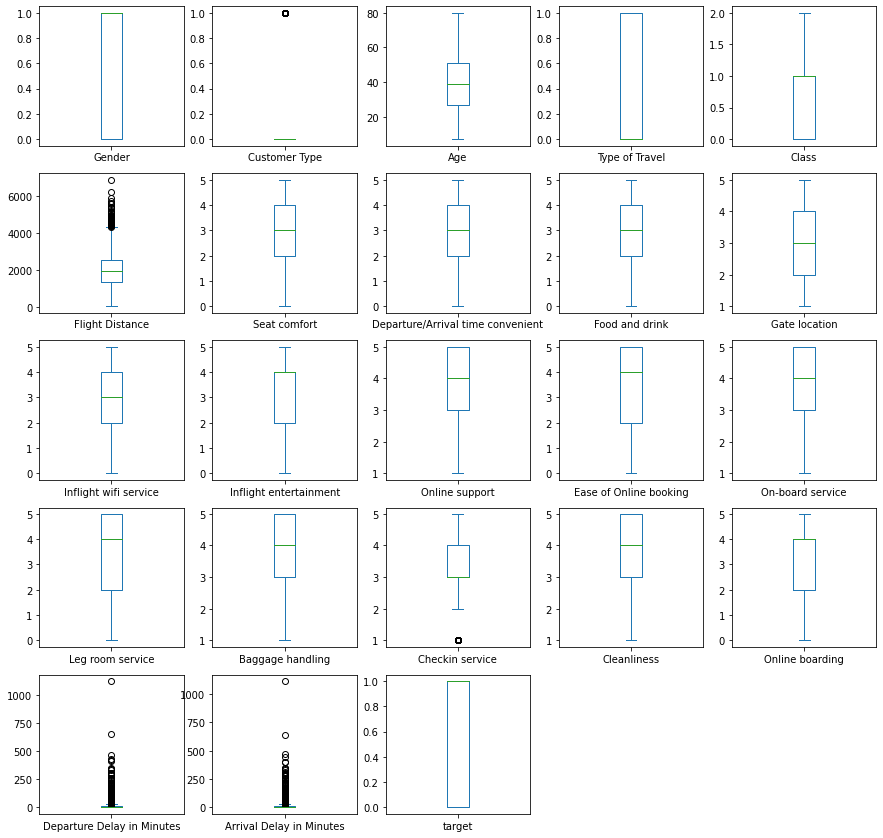

In [15]:
# 각 컬럼별 BoxPlot
train.plot(kind='box', subplots=True, layout=(7, 5), figsize=(15, 21))
plt.show()

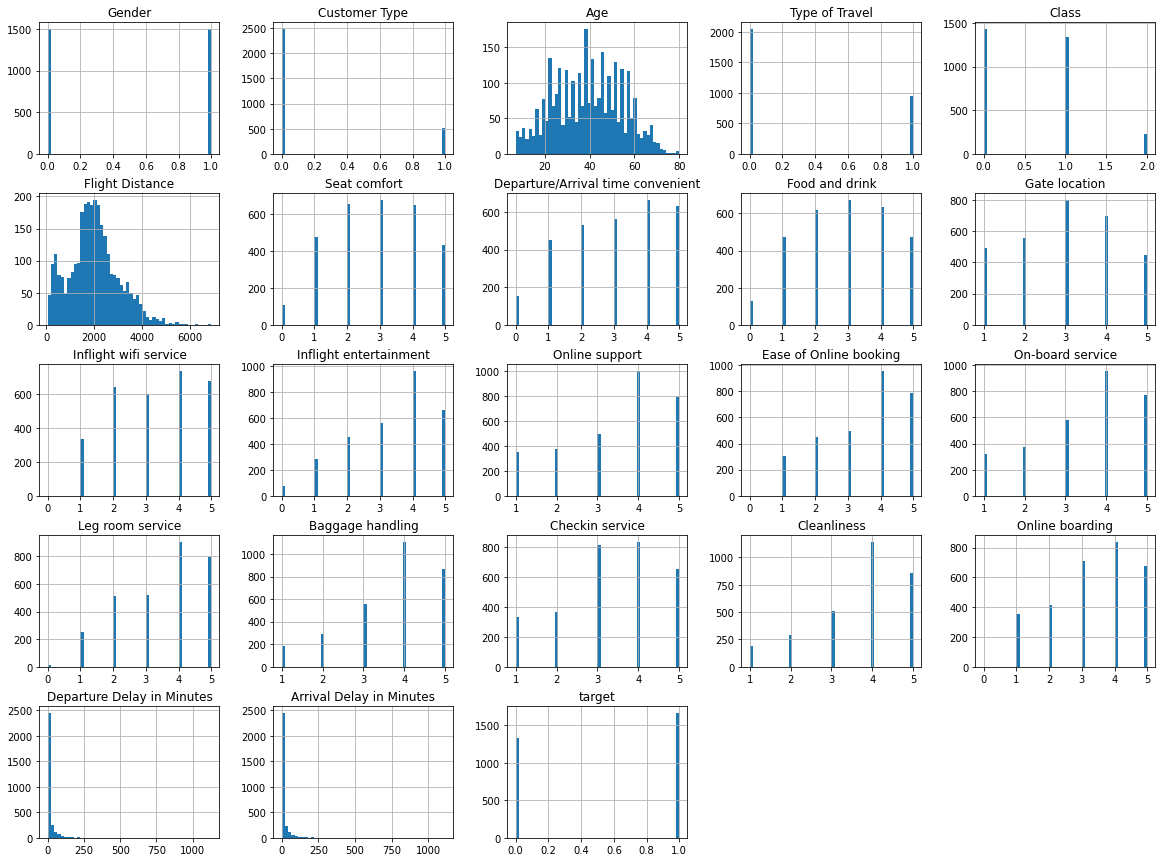

In [16]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
features = [
  'Gender',
 'Customer Type',
 'Age',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'target'
 ]

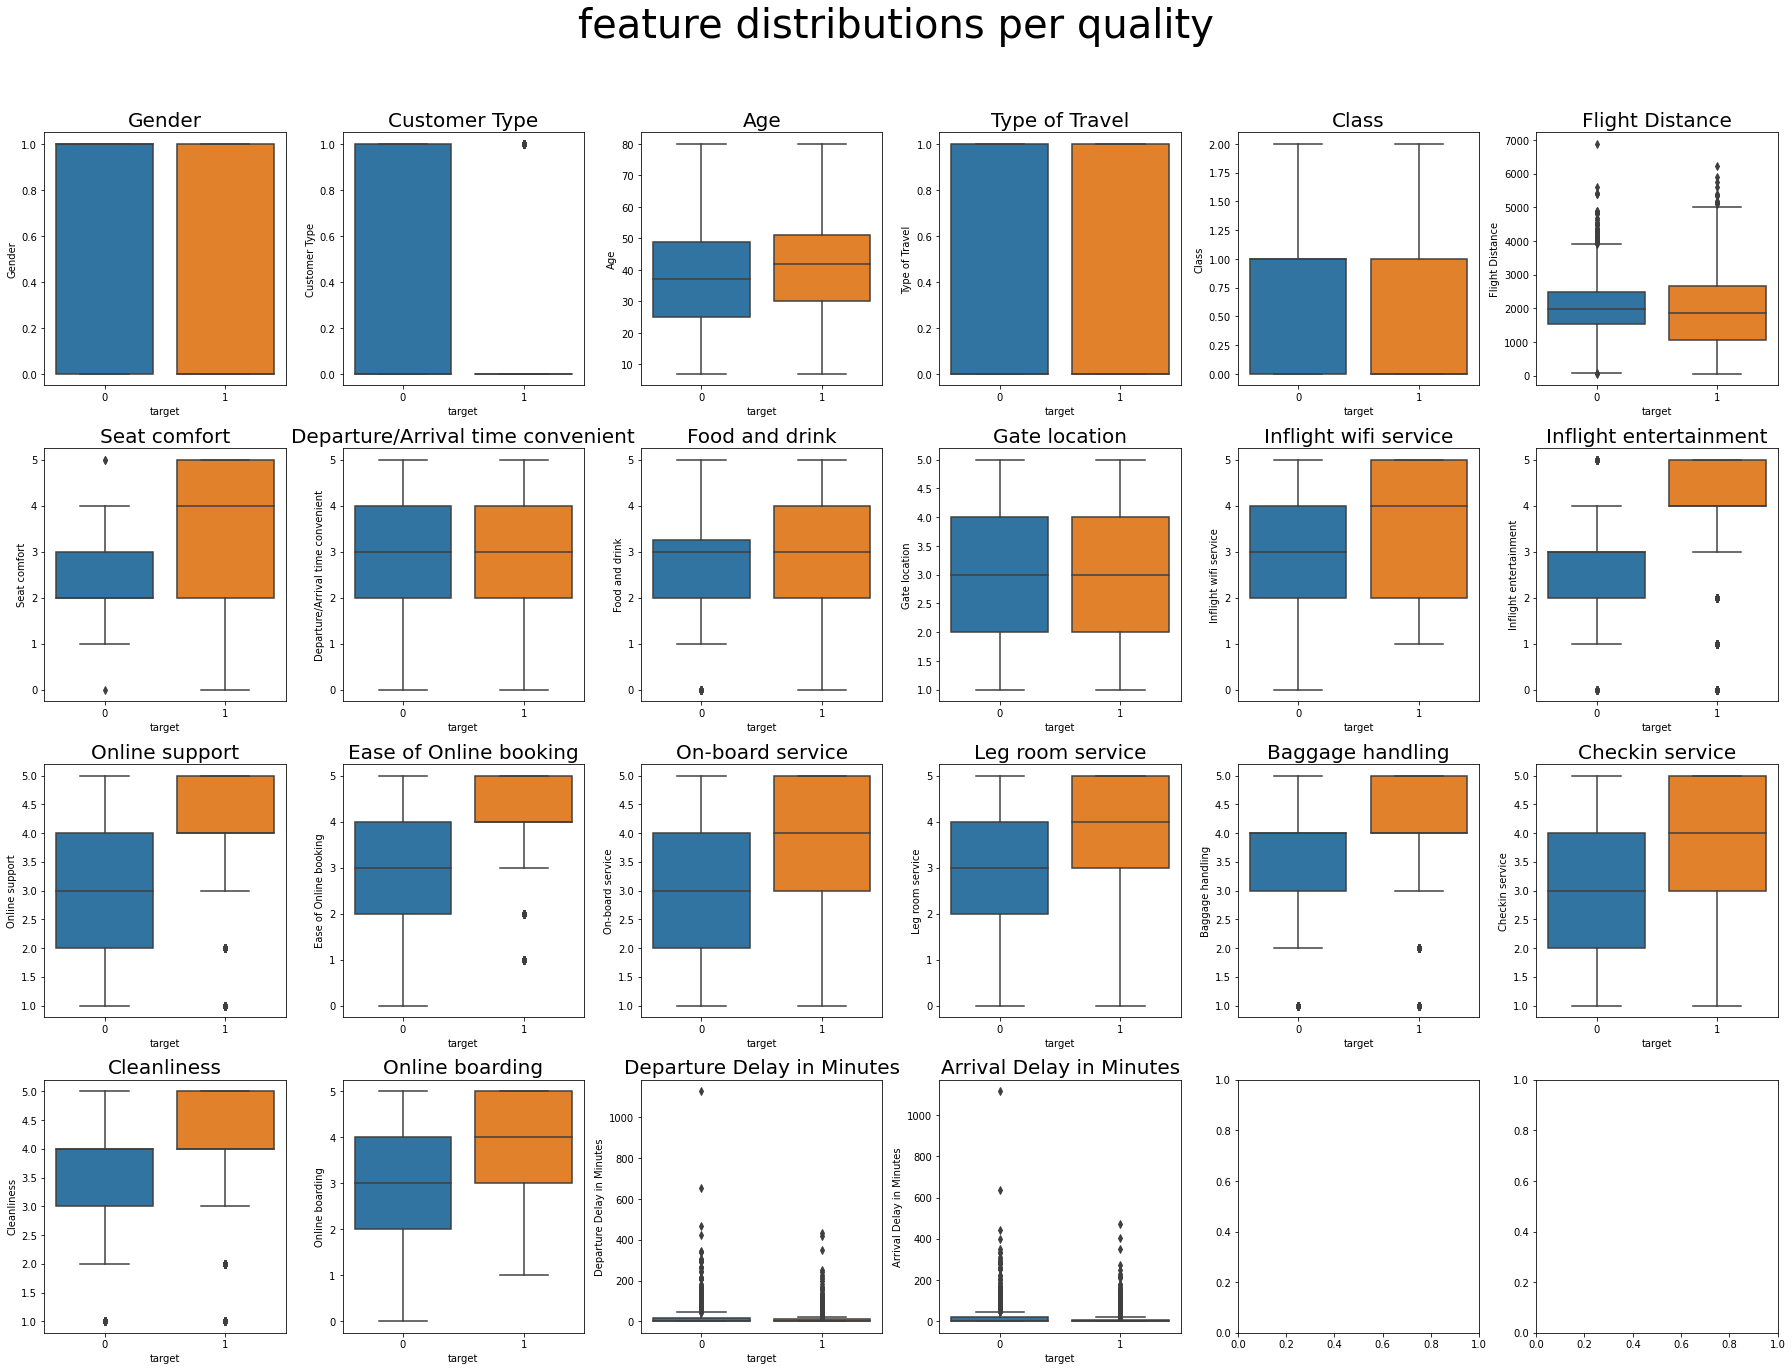

In [18]:
# 박스플롯
fig, axes = plt.subplots(4, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, features[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=train)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [19]:
feature = [
  'Gender',
 'Customer Type',
#  'Age',
 'Type of Travel',
 'Class',
#  'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
#  'Departure Delay in Minutes',
#  'Arrival Delay in Minutes',
 'target'
 ]

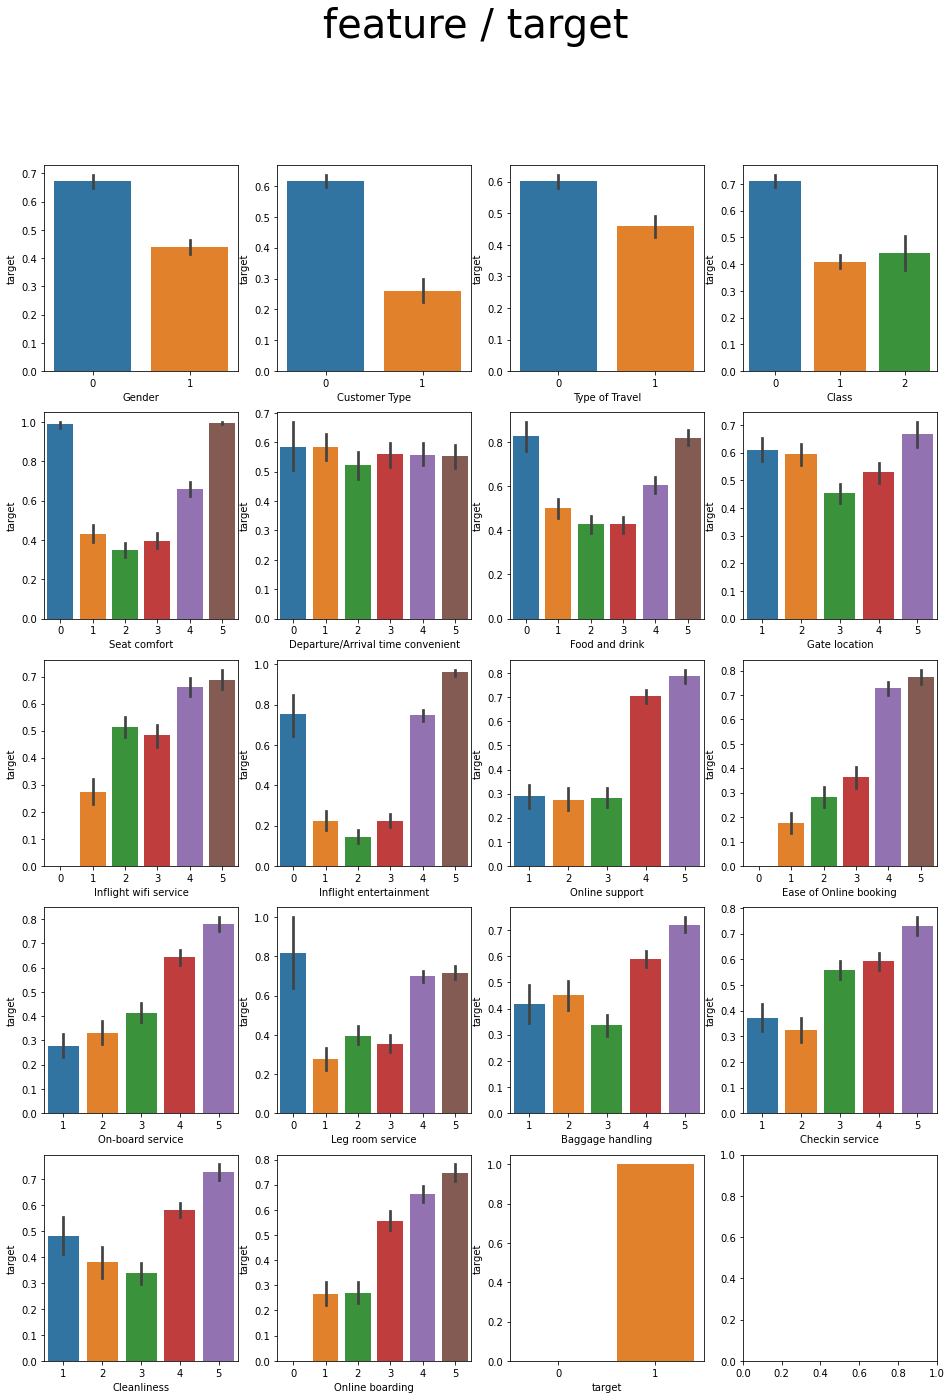

In [20]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=train, x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='target',palette='gist_rainbow_r', alpha=0.8)

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Flight Distance', y='Departure Delay in Minutes',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Flight Distance', y='Arrival Delay in Minutes',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

## 0 인 값 수정

In [ ]:
def index(x, y):
  return np.where((x == 0) & (y==0))


train_seat_index = index(train['Seat comfort'], train['Food and drink'])[0]
test_seat_index = index(test['Seat comfort'], test['Food and drink'])[0]

In [ ]:
def index_seat_Leg(x, y):
  return np.where((x == 0) & (y==0))


train_Leg_index = index_seat_Leg(train['Seat comfort'], train['Leg room service'])[0]
test_Leg_index = index_seat_Leg(test['Seat comfort'], test['Leg room service'])[0]

In [ ]:
train.loc[train_seat_index, 'Seat comfort'] = 4
train.loc[train_seat_index, 'Food and drink'] = 4
test.loc[test_seat_index, 'Seat comfort'] = 4
test.loc[test_seat_index, 'Food and drink'] = 4

In [ ]:
train.loc[train_Leg_index, 'Seat comfort'] = 4 
train.loc[train_Leg_index, 'Leg room service'] = 4 
test.loc[test_Leg_index, 'Seat comfort'] = 4
test.loc[test_Leg_index, 'Leg room service'] = 4

#### Seat이 0 인 친구들 중 food 값이 0 이 아닐 때

In [ ]:
def seat_zero_and_food_not_zero(x, y):
  return np.where((x == 0) & (y!=0)) , y


train_szaf_index = seat_zero_and_food_not_zero(train['Seat comfort'], train['Food and drink'])[0]
train_szafva_index = seat_zero_and_food_not_zero(train['Seat comfort'], train['Food and drink'])[1]

test_szaf_index = seat_zero_and_food_not_zero(test['Seat comfort'], test['Food and drink'])[0]
test_szafva_index = seat_zero_and_food_not_zero(test['Seat comfort'], test['Food and drink'])[1]

In [ ]:
train.loc[train_szaf_index[0] , 'Seat comfort'] = train_szafva_index[0]
test.loc[test_szaf_index[0] , 'Seat comfort'] = test_szafva_index[0]

#### Ease of Online Booking

In [ ]:
index_EO = train.loc[train['Ease of Online booking'] == 0 , : ].index[0]

print(train.loc[index_EO, :])

train.loc[index_EO,'Online boarding'] = train.loc[index_EO ,'Online support']
train.loc[index_EO,'Inflight wifi service'] = train.loc[index_EO ,'Online support']

####Departure Arrival time convenient

In [ ]:
def Departure_Arrival(x, y):
  return np.where((x == 0) & (y!=0)) , y


train_dept_index = Departure_Arrival(train['Departure/Arrival time convenient'], train['Gate location'])[0]
train_deptgate_index = Departure_Arrival(train['Departure/Arrival time convenient'], train['Gate location'])[1]

test_dept_index = Departure_Arrival(test['Departure/Arrival time convenient'], test['Gate location'])[0]
test_deptgate_index = Departure_Arrival(test['Departure/Arrival time convenient'], test['Gate location'])[1]

In [ ]:
train.loc[train_dept_index[0] , 'Departure/Arrival time convenient'] = train_deptgate_index[0]
test.loc[test_dept_index[0] , 'Departure/Arrival time convenient'] = test_deptgate_index[0]

#### Food and drink

In [ ]:
def Food_and_drink(x, y):
  return np.where((x == 0) & (y!=0)) , y


train_food_index = Departure_Arrival(train['Food and drink'], train['Seat comfort'])[0]
train_foodseat_index = Departure_Arrival(train['Food and drink'], train['Seat comfort'])[1]

test_food_index = Departure_Arrival(test['Food and drink'], test['Seat comfort'])[0]
test_foodseat_index = Departure_Arrival(test['Food and drink'], test['Seat comfort'])[1]

In [ ]:
train.loc[train_food_index[0] , 'Food and drink'] = train_foodseat_index[0]
test.loc[test_food_index[0] , 'Food and drink'] = test_foodseat_index[0]

#### Inflight wifi service

In [ ]:
train.loc[train['Inflight wifi service'] == 0 , 'Inflight wifi service'] = train.loc[train['Inflight wifi service'] == 0 , 'Ease of Online booking'] 
test.loc[train['Inflight wifi service'] == 0 , 'Inflight wifi service'] = test.loc[test['Inflight wifi service'] == 0 , 'Ease of Online booking'] 

####Inflight entertainment 

In [ ]:
train['Online_service'] = train['Ease of Online booking'] + train['Online boarding'] + train['Online support'] + train['Seat comfort'] + train['Food and drink']

In [ ]:
def lnflight_enter(x, y):
  return np.where((x == 0) & (y ==0))


train_enter_index = lnflight_enter(train['Inflight entertainment'], train['target'])[0]

In [ ]:
train.loc[train_enter_index, :]

In [ ]:
def lnflight_enter_0(x, y):
  return np.where((x == 0) & (y ==0))


train_enter_index = lnflight_enter(train['Inflight entertainment'], train['target'])[0]

In [ ]:
def lnflight_enter22(x, y, z, w, q):
  return np.where((x == 3) & (y ==3) & ((z == 4) | (z==5)) & (w == 0) & (q==0))

train_enter22_index = lnflight_enter22(train['Departure/Arrival time convenient'], train['Food and drink'], train['Inflight entertainment'], train['target'], train['Customer Type'])[0]

In [ ]:
def lnflight_enter33(x, y, z, w, q):
  return np.where((x == 3) & (y ==3) & ((z == 1) | (z==2) | (z==3)) & (w == 0) & (q==0))

train_enter33_index = lnflight_enter33(train['Departure/Arrival time convenient'], train['Food and drink'], train['Inflight entertainment'], train['target'], train['Customer Type'])[0]

In [ ]:
dd = train.loc[train_enter22_index, :]
dd

In [ ]:
test.loc[train_enter22_index, :]

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(dd.corr(), mask=np.zeros_like(dd.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

In [ ]:
dddd = train.loc[train_enter33_index, :]
dddd

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(dddd.corr(), mask=np.zeros_like(dddd.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

In [ ]:
train.loc[train_enter22_index, 'Inflight wifi service'].value_counts()

In [ ]:
test.loc[test['Inflight entertainment'] == 0 , :]

In [ ]:
train.loc[train_enter_index , 'Inflight entertainment'] = train.loc[train_enter_index, ]

In [ ]:
train.loc[index_EO, :]

In [ ]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = train, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

In [ ]:
"sstrain.loc[train['Seat comfort'] == 0, 'target'].value_counts()

In [ ]:
train.loc[train['Seat comfort'] == 0, 'target'] = 4
test.loc[test['Seat comfort'] == 0, 'Seat comfort'] = 4

In [ ]:
train.loc[train['Inflight wifi service'] == 0, 'target']

In [ ]:
train.loc[train['Food and drink'] == 0, 'target'].value_counts()

In [ ]:
train.loc[train['Food and drink'] == 0, 'Food and drink'] = 4
test.loc[test['Food and drink'] == 0, 'Food and drink'] = 4

In [ ]:
train.loc[train['Inflight wifi service'] == 0, 'Inflight wifi service'] = 0
test.loc[test['Inflight wifi service'] == 0, 'Inflight wifi service'] = 0

In [ ]:
train.loc[train['Inflight entertainment'] == 0, 'Inflight entertainment'] = train.loc[train['Inflight entertainment'] != 0, 'Inflight entertainment'].median()
test.loc[test['Inflight entertainment'] == 0, 'Inflight entertainment'] = test.loc[test['Inflight entertainment'] != 0, 'Inflight entertainment'].median()

In [ ]:
train.loc[train['Ease of Online booking'] == 0, 'Ease of Online booking'] = 

In [ ]:
train.loc[train['Leg room service'] == 0, 'Leg room service'] = train.loc[train['Leg room service'] != 0, 'Leg room service'].median()
test.loc[test['Leg room service'] == 0, 'Leg room service'] = test.loc[train['Leg room service'] != 0, 'Leg room service'].median()

In [ ]:
train.loc[train['Online boarding'] == 0, 'Online boarding'] = train.loc[train['Online boarding'] != 0, 'Online boarding'].mean()

In [ ]:
train.loc[train['Departure/Arrival time convenient'] == 0, 'Departure/Arrival time convenient'] = train.loc[train['Departure/Arrival time convenient'] != 0, 'Departure/Arrival time convenient'].median()
test.loc[test['Departure/Arrival time convenient'] == 0, 'Departure/Arrival time convenient'] = test.loc[test['Departure/Arrival time convenient'] != 0, 'Departure/Arrival time convenient'].median()

In [ ]:
train['Delayed'] = (train['Departure Delay in Minutes'] 
                         + train['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)
test['Delayed'] = (test['Departure Delay in Minutes'] 
                         + test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [ ]:
# train['delayMinute'] = (train['Departure Delay in Minutes'] + train['Arrival Delay in Minutes'] ) / 2
# test['delayMinute'] = (test['Departure Delay in Minutes'] + test['Arrival Delay in Minutes'] ) / 2

In [ ]:
train['Online_service'] = train['Ease of Online booking'] + train['Online boarding'] + train['Online support']
test['Online_service'] = test['Ease of Online booking'] + test['Online boarding'] + test['Online support']

In [ ]:
# train['one'] = (train['Seat comfort'] + train['Food and drink'] + train['Seat comfort'] + train['Gate location'] + train['Inflight wifi service'] + train['Inflight entertainment'] + train['Baggage handling']
#                          + train['Departure/Arrival time convenient'] + train['Online support'] + train['Ease of Online booking'] + train['On-board service'] + train['Leg room service'] 
#                 + train['Checkin service'] + train['Cleanliness'] + train['Online boarding']
#                 ).apply(lambda x : 0 if x > 29 else 1)


# # test['Delayed'] = (test['Departure Delay in Minutes'] 
# #                          + test['Arrival Delay in Minutes']).apply(lambda x : 0 if x > 0 else 1)

In [ ]:
def age_(x):
  return int(x/10)

train['age_ten'] = train['Age'].apply(age_)
test['age_ten'] = test['Age'].apply(age_)

In [ ]:
# train['short_travel'] = train[[ 'Flight Distance', 'Departure Delay in Minutes']].apply(lambda x: (0,1) [(x['Flight Distance'] > 1000 and x['Flight Distance'] < 2700 and x['Departure Delay in Minutes'] > 0)], axis=1)
# test['short_travel'] = test[[ 'Flight Distance', 'Departure Delay in Minutes']].apply(lambda x: (0,1) [(x['Flight Distance'] > 1000 and x['Flight Distance'] <2700 and x['Departure Delay in Minutes'] > 0 )], axis=1)

In [ ]:
train['Order'] = train[['Inflight wifi service','Departure/Arrival time convenient', 'Gate location']].sum(axis=1)
# train['Comfort'] = train[['Food and drink','Seat comfort', 'Inflight entertainment']].sum(axis=1)
train['Comfort'] = train[['Food and drink','Seat comfort']].sum(axis=1)

train['Service'] = train[['Leg room service', 'Baggage handling']].sum(axis=1)
# train['Service'] = train[['Inflight entertainment','Leg room service', 'Baggage handling']].sum(axis=1)

train['Online_service'] = train['Ease of Online booking'] + train['Online boarding'] + train['Online support'] + train['Seat comfort'] + train['Food and drink']

In [ ]:
test['Order'] = test[['Inflight wifi service','Departure/Arrival time convenient', 'Gate location']].sum(axis=1)
test['Comfort'] = test[['Food and drink','Seat comfort', 'Inflight entertainment']].sum(axis=1)
test['Service'] = test[['Inflight entertainment','Leg room service', 'Baggage handling']].sum(axis=1)
test['Online_service'] = test['Ease of Online booking'] + test['Online boarding'] + test['Online support']

In [ ]:
train = train.drop(['Arrival Delay in Minutes', 'Food and drink'], axis = 1)
test = test.drop(['Arrival Delay in Minutes', 'Food and drink'], axis = 1)

In [ ]:
# train = train.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Food and drink', 'Ease of Online booking', 'Online boarding', 'Online support', 'Age'], axis = 1)
# test = test.drop(['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Food and drink', 'Ease of Online booking', 'Online boarding', 'Online support', 'Age'], axis = 1)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Online_service',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Service',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Order',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Flight Distance', y='Comfort',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20) 

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Online_service',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Service',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Comfort',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
train

## skew

In [ ]:
numeric_feature = [
    'Flight Distance',
    # 'Age',
    # 'delayMinute',
    'Departure Delay in Minutes',
    # 'Arrival Delay in Minutes',
]

In [ ]:
for xstr in numeric_feature:
    print(xstr, "Scew :", train[xstr].skew())

In [ ]:
train['Departure Delay in Minutes'] = np.log1p(train['Departure Delay in Minutes'])
test['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])

print("Scew :", train['Departure Delay in Minutes'].skew())
print("Scew :", test['Departure Delay in Minutes'].skew())

In [ ]:
# train['delayMinute'] = np.log1p(train['delayMinute'])
# test['delayMinute'] = np.log1p(test['delayMinute'])

# print("Scew :", train['delayMinute'].skew())

In [ ]:
plt.figure(figsize=(20,10), dpi=100)
sns.scatterplot(data=train , x='Departure Delay in Minutes', y='Service',hue='target',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,20)

In [ ]:
train['bad'] = train[[ 'Service', 'Comfort' , 'Online_service' , 'Departure Delay in Minutes']].apply(lambda x: (0,1) [(
    (x['Departure Delay in Minutes'] >=3 and x['Service'] <= 10)
    )], axis=1)
   
test['bad'] = test[[ 'Service', 'Comfort' , 'Online_service' , 'Departure Delay in Minutes']].apply(lambda x: (0,1) [(
    (x['Departure Delay in Minutes'] >= 3 and x['Service'] <= 10)
    )], axis=1)  

In [ ]:
train['badcom'] = train[[ 'Service', 'Comfort' , 'Online_service' , 'Departure Delay in Minutes']].apply(lambda x: (0,1) [(
    (x['Departure Delay in Minutes'] >=3 and x['Comfort'] <= 10)
    )], axis=1)
   
test['badcom'] = test[[ 'Service', 'Comfort' , 'Online_service' , 'Departure Delay in Minutes']].apply(lambda x: (0,1) [(
    (x['Departure Delay in Minutes'] >= 3 and x['Comfort'] <= 10)
    )], axis=1)  

## Heat map

In [ ]:
plt.subplots(figsize=(25,25))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

In [ ]:
plt.subplots(figsize=(15,15))
sns.heatmap(train.corr(), mask=np.zeros_like(train.corr(), dtype=bool),
            square=True, annot=True, cmap='Greens')
plt.show()

In [ ]:
# train 및 test 데이터 분할
# x_train, x_test, y_train, y_test = train_test_split(train,test, random_state=42, test_size=0.1)

In [ ]:
num_cols = train.select_dtypes(exclude='object').columns.to_list()
num_cols

In [ ]:
train = train.astype('float')
test = test.astype('float')

In [ ]:
train.info()
test.info()

In [ ]:
models()

In [ ]:
from pycaret.classification import *

setup_ = setup(data = train, use_gpu = True, target = 'target', n_jobs = -1, train_size = 0.9, feature_interaction = True, feature_ratio = True, silent = True)
#Slient를 사용하면 엔터 안쳐줘두 댐

In [ ]:
best3 = compare_models(n_select = 5, sort = 'Accuracy', fold = 10, cross_validation=True)
best3

## Fin

In [ ]:
blend = blend_models(estimator_list= best3 , fold=10, optimize='Accuracy', method='soft', choose_better=True) #voting regressor로 블렌딩합니다.
pred_holdout = predict_model(blend)

In [ ]:
# best model 5
# 0.9433	0.9394	0.9653	0.9382	0.9516	0.8833	0.8838

# Model	Accuracy	AUC	Recall	Prec.	F1	Kappa	MCC
# 0	Voting Classifier	0.9533	0.9848	0.9595	0.9595	0.9595	0.9044	0.9044

In [ ]:
# lgbm = create_model('lightgbm')
# tuned_lgbm= tune_model(lgbm, optimize='Accuracy')

In [ ]:
# predict_model(tuned_lgbm)

In [ ]:
# et = create_model('et')
# tuned_et = tune_model(et, optimize='Accuracy')

In [ ]:
# predict_model(tuned_et)

In [ ]:
# cb = create_model('catboost')
# tuned_cb = tune_model(et, optimize='Accuracy')

In [ ]:
# predict_model(cb)

In [ ]:
# blend_best2 = blend_models(estimator_list=[et, cb], fold=10, optimize='Accuracy', method='soft',  choose_better=True)
# predict_model(blend_best2)

In [ ]:
# final_model = finalize_model(blend_best2)
# pred= predict_model(final_model, test)
# pred

In [ ]:
final_model = finalize_model(blend)
pred= predict_model(final_model, test)
pred

In [ ]:
sample_submission.info()

In [ ]:
sample_submission['target'] = pred['Label']
sample_submission

In [ ]:
sample_submission = sample_submission.astype({'target':'float'})
sample_submission = sample_submission.astype({'target':'int'})
sample_submission 

In [ ]:
sample_submission.to_csv("ten_airplane.csv",index=False)